# Advection-diffusion-reaction model for modeling of SIMS depth profiling
## *Part 1: Model definition and examples of calculations*
_Robert J. Paruch, 2016, 2020_

## Equation
An advection-diffusion-reaction equation for mass transfer

$$
\frac{\partial u}{\partial t} = -a \frac{\partial u}{\partial x} +
                                \frac{\partial}{\partial x} \left(D_u(x) \frac{\partial u}{\partial x} \right) +
                                R_u(x)
$$

Independent variables:  
* $t$ -- time [s], $t = 0$ denotes start of the sputtering process, $t \ge 0$  
* $x$ -- depth [m], $x = 0$ denotes the surface of the sample, $0 \le x \le 1$

Dependent variable:
* $u = u(x; t)$ - concentration profile of mass for component $u$ [a.u.], $0 \le u \le 1$

Parameters:
* $a$ - velocity the mass is traveling with [m/s]
* $D_u(x)$ - diffusion coefficient of component $u$ [m<sup>2</sup>/s]
* $R_u(x)$ - reaction term for component $u$ [1/s]

Initial condition:
* $u_0 = u(x, t = 0)$ - a rectangular concentration profile for component $u$ corresponding to a layer of mass embedded in the sample, $u_0 = 1$ for $x_1 \le x \le x_2$ and $u_0 = 0$ otherwise, where $x_1$ - depth the layer is embedded at, $x_2 - x_1$ - layer width

Numerical method:
* Crank-Nicolson

Boundary condition implemented:
* Neumann

## Velocity
A constant velocity the mass is traveling with. Note: In future implementation of the model the velocity will depend on local concentration of the component.

## Diffusion coefficient
Description of bombardment-induced, diffusion-like processes (ion beam mixing) and processes resulting in diffusion-like effects (surface roughening). Description of thermal diffusion.

$$ D_u(x) = D_u s_D(x) + D_{u, const} $$

Parameters:
* $D_u$ - magnitude of the bombardment-induced effects for component $u$  
* $s_D(x)$ - depth dependence of the bombardment-induced diffusivity (sigmoid function)  
* $D_{u, const}$ - constant contribution of thermal diffusion for component $u$

A **sigmoid function** is used here to formalize the depth dependence of model parameters for bombardment-induced effects. It takes on values from 0 to 1, where 0 means no effect and 1 means full effect. The shape of the sigmoidal function is determined by the inflection point and slope.

Effect of changing the inflection point is shown below.

In [1]:
from adrmdp.model import ADRMDP, comp_depth_prof

In [2]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


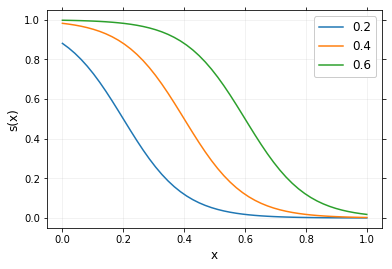

In [3]:
x = linspace(0, 1)
for x_infl in [0.2, 0.4, 0.6]:
    plot(x, ADRMDP.sigm_fun(x, x_infl, 10, 1), label=x_infl)  # x_infl, slope, ampl
xlabel('x')
ylabel('s(x)')
legend();

Effect of changing the slope is shown below.

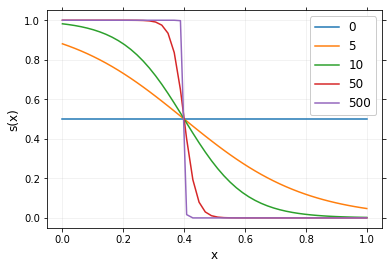

In [4]:
x = linspace(0, 1)
for slope in [0, 5, 10, 50, 500]:
    plot(x, ADRMDP.sigm_fun(x, 0.4, slope, 1), label=slope)  # x_infl, slope, ampl
xlabel('x')
ylabel('s(x)')
legend();

## Reaction term
Description of bombardment-induced reactions.

$$ R_u(x) = R_u s_R(x) $$

Parameters:  
$R_u$ - reaction coefficient for component $u$  
$s_R(x)$ - depth dependence of the reaction term (sigmoid function)

Note: The implemented now reaction coefficient (`reac_type=1`) has a form of $ R_u = -k_1 u $, where $k_1$ - reaction rate constant

## Examples of calculations
Illustrative examples of model calculations are shown below for given parameters.

### Constant diffusivity

In [5]:
m1 = ADRMDP(
    samp_len = 20,  # (nm)
    time = 4.5,  # (s)
    l_depth_u = [13.22],  # (nm)
    l_width_u = [0.9444],  # (nm)
    vel_u = 8.86222,  # (nm/s)
    diff_ampl_u = 0,  # (nm^2/s)
    diff_const_u = 1.4,  # (nm^2/s)
)

calculating... 50% done


Depth dependence of the diffusion term $D_u(x)$ is shown below.

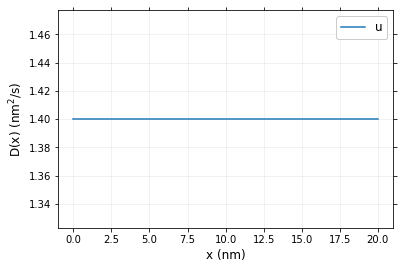

In [6]:
m1.plot_diff()

The output of model calculations is the concentration surface $u = u(x, t)$. The dependences of interest are intersections of this surface for given times, $t$, or depths, $x$.

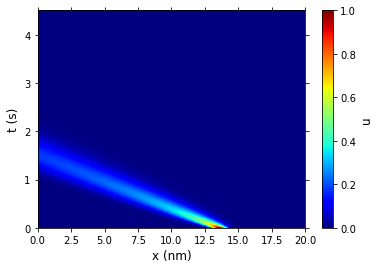

In [7]:
m1.plot_conc()

The concentration profiles are shown below for given times.

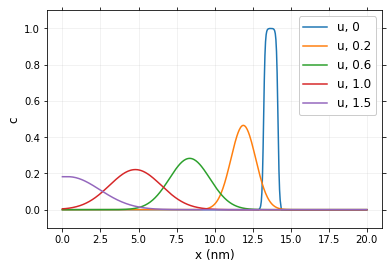

In [8]:
m1.plot_conc_sect(times=[0, 0.2, 0.6, 1.0, 1.5])

The initial concentration profile, $t = 0$, is rectangular. It corresponds to a layer of mass embedded in the sample at given depth. As the time passes, $t > 0$, the mass travels toward the surface of the sample. During this process the profile gets broaden due to constant diffusion applied. The constant diffusivity (vs. depth) is responsible for Gaussian broadening of the profile.

The depth profile of the embedded layer, as measured by SIMS, is a time dependence of the concentration at the sample surface, $x = 0$, shown below.

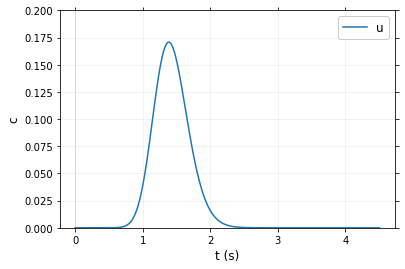

In [9]:
m1.plot_depth_prof(var='time')

Given $a$, time can be transformed to eroded depth, $x$. Shown below is the depth profile vs. eroded depth, with the location of the initial layer marked out.

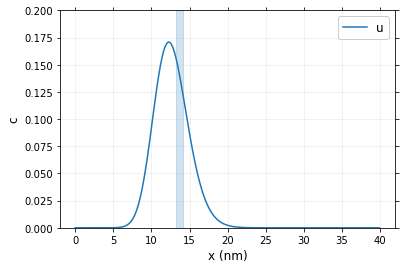

In [10]:
m1.plot_depth_prof()

This is a symmetrical depth profile, peaking at the location of the initial layer.

### Variable diffusivity

In [11]:
m2 = ADRMDP(
    samp_len = 20,  # (nm)
    time = 4.5,  # (s)
    l_depth_u = [13.22],  # (nm)
    l_width_u = [0.9444],  # (nm)
    vel_u = 8.86222,  # (nm/s)
    diff_ampl_u = 17.9479,  # (nm^2/s)
    diff_slope_u = 0.710355,  # (1/nm)
    diff_x_infl_u = 3.49758  # (nm)
)

calculating... 50% done


Depth dependence of the diffusion term $D_u(x)$ is shown below.

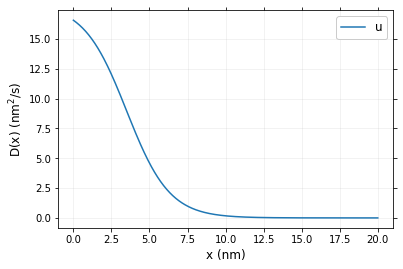

In [12]:
m2.plot_diff()

The bombardment-induced diffusivity have the largest effect just below the surface, $x = 0$. As $x$ increases (deeper in the sample), the bombardment-induced diffusivity decreases.

The concentration surface $u = u(x, t)$ is shown below.

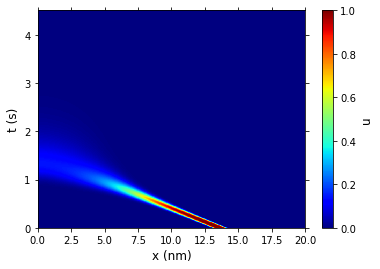

In [13]:
m2.plot_conc()

The concentration profiles are shown below for given times.

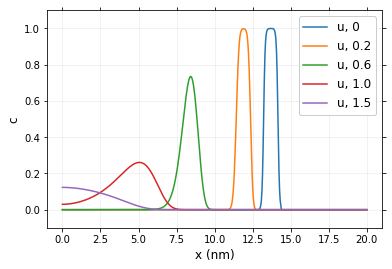

In [14]:
m2.plot_conc_sect(times=[0, 0.2, 0.6, 1.0, 1.5])

In this case, as the profile travels toward the surface of the sample, it gets broaden and becomes asymmetrical.

Finally, shown below is the depth profile vs. eroded depth, with the location of the initial layer marked out.

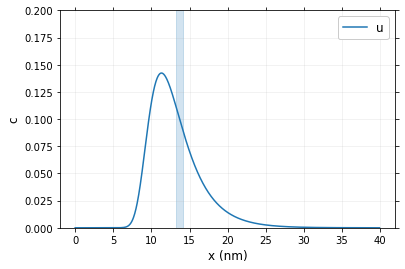

In [15]:
m2.plot_depth_prof()

This is an asymmetrical depth profile with the peak shifted toward the surface relative to the initial layer location.

### Variable diffusivity, reactions

In [16]:
m3 = ADRMDP(
    samp_len = 20,  # (nm)
    time = 4.5,  # (s)
    l_depth_u = [13.22],  # (nm)
    l_width_u = [0.9444],  # (nm)
    vel_u = 8.86222,  # (nm/s)
    diff_ampl_u = 17.9479,  # (nm^2/s)
    diff_slope_u = 0.710355,  # (1/nm)
    diff_x_infl_u = 3.49758,  # (nm)
    reac_type = 1,
    reac_const = [5],  # (1/s)
    reac_slope = 0.710355,  # (1/nm)
    reac_x_infl = 3.49758  # (nm)
)

calculating... 50% done


Depth dependence of the reaction term $s_R(x)$ is shown below.

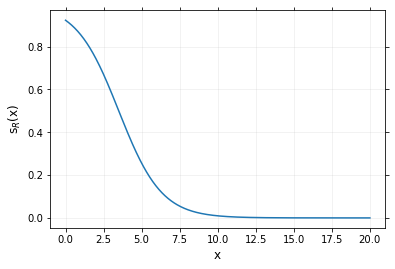

In [17]:
m3.plot_reac()

In this case, it is assumed that the depth dependence of the reaction term, describing bombardment-induced reactions, is the same as depth dependence of the bombardment-induced diffusivity.

The concentration surface $u = u(x, t)$ is shown below.

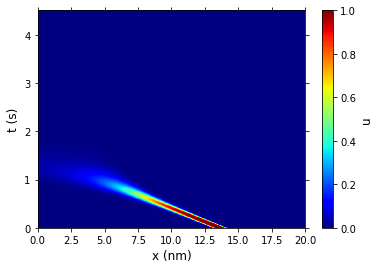

In [18]:
m3.plot_conc()

The concentration profiles are shown below for given times.

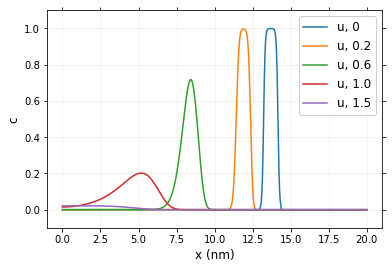

In [19]:
m3.plot_conc_sect(times=[0, 0.2, 0.6, 1.0, 1.5])

In this case, as the profile travels toward the surface of the sample, it gets broaden, becomes asymmetrical and decays.

Finally, shown below is the depth profile vs. eroded depth, with the location of the initial layer marked out.

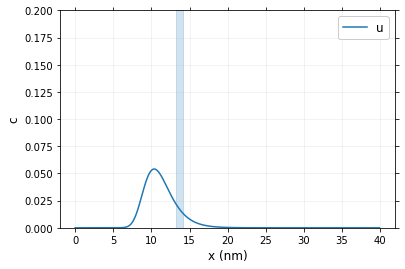

In [20]:
m3.plot_depth_prof()

This is an asymmetrical depth profile with the peak shifted toward the surface relative to the initial layer location, which intensity is lower than in the previous case due to decay caused by chemical reactions.

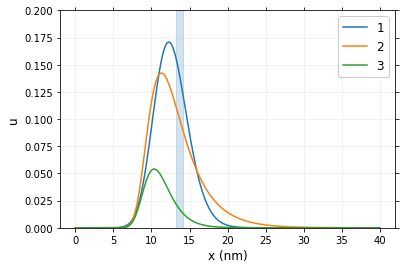

In [21]:
comp_depth_prof(m1, m2, m3)